In [1]:
#We will compare the accuracy of three models in the same datset;
1. Vanilla Logistic Regression
2. Ridge Logistic Regression and
3. Lasso Logistic Regression

In [18]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')

In [2]:
df = pd.read_csv('Heart_disease.csv')

In [3]:
df.head()

,age,sex,chestpain_type,resting_bp,chol,fasting_blood_sugar,restecg_result,maxheart_rate,exercice_in_angina,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age                      int64
sex                      int64
chestpain_type           int64
resting_bp               int64
chol                     int64
fasting_blood_sugar      int64
restecg_result           int64
maxheart_rate            int64
exercice_in_angina       int64
oldpeak                float64
slope                    int64
ca                       int64
thal                     int64
target                   int64
dtype: object

In [5]:
df.head()

,age,sex,chestpain_type,resting_bp,chol,fasting_blood_sugar,restecg_result,maxheart_rate,exercice_in_angina,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
features = df[['age', 'sex', 'chestpain_type', 'resting_bp', 'chol', 'fasting_blood_sugar', 'restecg_result', 'maxheart_rate',
              'exercice_in_angina', 'oldpeak', 'slope', 'ca', 'thal']]
target = df['target']

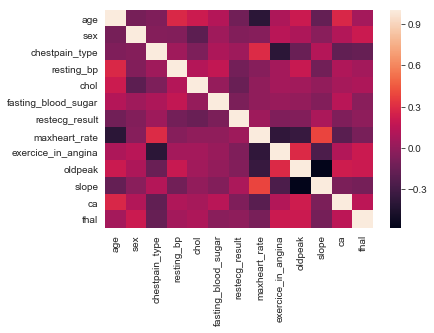

In [7]:
sns.heatmap(features.corr())

In [8]:
#Splitting the data into train and test groups

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=50 )

Modeling

Vanilla Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression (C=1e9)
fit = lr.fit(X_train, y_train)

#print accuracy rate
print('Vanilla Logistic Regression Coefficients')
print(fit.coef_ )
print(fit.intercept_)
pred_y = lr.predict(X_train)


print('\n Vanilla Logistic Regression Accuracy')
print(pd.crosstab(pred_y, y_train))

print('\n Vanilla Logistic Regression Percentage Accuracy')
print(lr.score(X_train, y_train))

print('\n Vanilla Logistyic Regression cross validation score' )
lr_score = cross_val_score(lr, X_train, y_train, cv=5)
print(lr_score)

Vanilla Logistic Regression Coefficients
[[ 0.01235627 -1.47212143  0.87655547 -0.01001303 -0.00599531 -0.34302445
   0.36977865  0.0152963  -1.41926136 -0.48906086  0.73905831 -0.85963486
  -0.81465763]]
[2.41406955]

 Vanilla Logistic Regression Accuracy
target   0    1
row_0          
0       80   11
1       19  102

 Vanilla Logistic Regression Percentage Accuracy
0.8584905660377359

 Vanilla Logistyic Regression cross validation score
[0.86046512 0.88372093 0.86046512 0.78571429 0.70731707]


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [17]:
#Vanilla Logistic Regression Accuracy in Test set
print(lr.score(X_test, y_test))

0.7912087912087912


Ridge Regression

In [10]:
from sklearn import linear_model

ridgeregr = linear_model.Ridge(alpha=10,fit_intercept=False)
rr_fit = ridgeregr.fit(X_train,y_train)
print("Ridge Regression Coefficients: ",rr_fit.coef_)
print("Intercept: ",rr_fit.intercept_)
pred_y = rr_fit.predict(X_train)

print("Ridge Regression Percentage Accuracy: ",ridgeregr.score(X_test,y_test))

Ridge Regression Coefficients:  [ 0.00449509 -0.13288112  0.10733509 -0.00034013 -0.00028057 -0.03877559
  0.04078322  0.00439761 -0.16431541 -0.05756603  0.08785539 -0.10422171
 -0.08897287]
Intercept:  0.0
Ridge Regression Percentage Accuracy:  0.43658179181641155


Ridge Logistic Regression

In [11]:
ridge_lr= LogisticRegression(C=10, penalty ='l2')
fit2 = ridge_lr.fit(X_train, y_train)

#Print accuracy rate
print('Ridge Logistic Regression Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred2 = fit2.predict(X_train)

print('\n Ridge logistic regression Accuracy:')
print(pd.crosstab(y_pred2, y_train))

print('\ Ridge Logistic Regression Percentage Accuracy:')
print(fit2.score(X_train, y_train))

print('\Ridge Logistic Regression Cross Validation Score:')
ridge_lr_score= cross_val_score(fit2, X_train, y_train, cv=5 )
print(ridge_lr_score)

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ridge Logistic Regression Coefficients
[[ 0.01235627 -1.47212143  0.87655547 -0.01001303 -0.00599531 -0.34302445
   0.36977865  0.0152963  -1.41926136 -0.48906086  0.73905831 -0.85963486
  -0.81465763]]
[2.41406955]

 Ridge logistic regression Accuracy:
target   0    1
row_0          
0       80    9
1       19  104
\ Ridge Logistic Regression Percentage Accuracy:
0.8679245283018868
\Ridge Logistic Regression Cross Validation Score:
[0.88372093 0.88372093 0.86046512 0.76190476 0.70731707]


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Ridge regression Accuracy in the test set
print(fit2.score(X_test, y_test))

0.8021978021978022


LASSO Regression

In [12]:
from sklearn.linear_model import Lasso

lass = Lasso(alpha=0.25, fit_intercept=False)
lass.fit(X_train, y_train)
print('Lasso Accuracy: ', lass.score(X_train, y_train))
print('Lasso Coefficients: ', lass.coef_)
print('Lasso Cross Validation Scores: \n', cross_val_score(lass, X_train, y_train))

Lasso Accuracy:  0.18591157612635803
Lasso Coefficients:  [-0.         -0.          0.         -0.00291084 -0.00088906 -0.
  0.          0.00760107 -0.         -0.          0.         -0.
 -0.        ]
Lasso Cross Validation Scores: 
 [0.16595452 0.18571603 0.00816056]


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LASSO Logistic Regression


In [14]:
lr_l1 = LogisticRegression(C=10, penalty='l1')
lasso = lr_l1.fit(X_train, y_train)


print('\n Logistic Regression Coefficients')
print(lasso.coef_)
print(lasso.intercept_)
y_pred_lasso= lasso.predict(X_train)

print('\n Lasso Logistic Regression Accuracy')
print(pd.crosstab(y_pred_lasso, y_train))


print('\n Lasso Logistic Regression Percentage Accuracy')
print(lasso.score(X_train, y_train))

print('\n Lasso Logistic Regression Cross Validation Accuracy')
lasso_score = cross_val_score(lasso, X_train, y_train, cv= 5)
print(lasso_score)


 Logistic Regression Coefficients
[[ 0.01662423 -1.41806482  0.8614574  -0.0089946  -0.00561086 -0.31614476
   0.36994404  0.0175987  -1.38418979 -0.48060353  0.72660056 -0.84820579
  -0.77993617]]
[1.48550589]

 Lasso Logistic Regression Accuracy
target   0    1
row_0          
0       81    9
1       18  104

 Lasso Logistic Regression Percentage Accuracy
0.8726415094339622

 Lasso Logistic Regression Cross Validation Accuracy
[0.86046512 0.88372093 0.86046512 0.78571429 0.70731707]


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [15]:
#Lasso Logistic Regression Accuracy in the test set 
print(lasso.score(X_test, y_test))

0.7912087912087912


In [ ]:
#We can see that Ridge Logistic Regression gives slightly higher accuracy in the test data compared to other two regressions. 
#Hence I would choose the accuracy given by Ridge Logistic Regression model over other two. 